# aSPEM Experiment : defining a protocol




In [1]:
%run 0_parameters.ipynb


WELCOME

2020-03-02T15:57:43+01:00

CPython 3.5.2
IPython 5.3.0

numpy 1.16.3
matplotlib 3.0.3
torch 1.1.0

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.4.0-83-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit
host name  : INV-OPE-HP01
Git hash   : f6b7949acbee171bdffab290b62f0a7fc5595c32
Git repo   : https://github.com/chloepasturel/AnticipatorySPEM.git
Git branch : master


In [2]:
import os
if not os.path.exists('figures/Experiment'):
    os.makedirs('figures/Experiment')

In [3]:
msfigpath = '../PasturelMontagniniPerrinet2019/figures'
#exts = ['.svg'] #'.png', '.svg', '.pdf']
from  aSPEM import Analysis
e = Analysis()

from aSPEM import binomial_motion

In [4]:
num_block = 0

color=[['k', 'k'], [color_true_p, color_true_p], ['k','none']]
alpha = [[.35, .15],[.35,.15], [0,0]]

In [5]:
figname = '1_A_Experiment_randomblock'

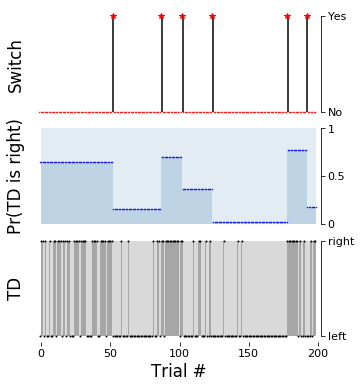

In [6]:
N_trials = 200
trials, p = binomial_motion(N_trials=N_trials, N_blocks=3, tau=40, seed=51, Jeffreys=True, N_layer=3)

t_label_f = t_label/3
fig_width_f = fig_width/6

    
fig, axs = plt.subplots(3, 1, figsize=(fig_width_f, fig_width_f))
fig, axs = e.plot_experiment_old(num_block=[num_block], p=p, fig=fig, axs=axs[::-1], color=color, alpha=alpha,
                             t_label=t_label_f,
                             titre=None, mode='planter les choux', pause=0, TD=True, ec = 0.15)



#axs[0].fill_between(range(N_trials), p[:, 0, 0], lw=.5, alpha=alpha[0][0], facecolor=color[0][0], step='pre')

mask = np.ones(N_trials)
mask[p[:, num_block, -1]==0] *= np.nan
#axs[-1].plot(np.arange(N_trials)-.5, mask-.02, '^')
#axs[-1].cla()
axs[-1].plot(np.arange(N_trials)-1., mask, 'r*')

axs[-1].vlines(np.arange(N_trials)-0.5, 0, p[:, num_block, -1] + (mask-1))


mask = np.zeros(N_trials)
mask[p[:, num_block, -1]==1] *= np.nan
axs[-1].plot(np.arange(N_trials)-1., mask, 'r.', ms=1)

#axs[1].vlines(np.arange(N_trials)-.5, 0, p[:, num_block, 1], lw=.1, color='b')
#axs[1].vlines(np.arange(N_trials)-.5, 1, p[:, num_block, 1], lw=.1, color='b')
axs[1].plot(np.arange(N_trials)-.5, p[:, num_block, 1], 'b.', ms=1)
axs[0].plot(np.arange(N_trials)-.5, p[:, num_block, 0], 'k.', ms=2)


axs[0].set_xticks(axs[-1].get_xticks()+.5)
axs[0].set_xticklabels(axs[-1].get_xticklabels())

axs[-1].set_xticks(axs[1].get_xticks())
axs[-1].set_xticklabels(axs[1].get_xticklabels())
axs[-1].set_xlabel('')

#axs[0].set_xlabel(axs[-1].get_xlabel())
axs[0].set_xlabel('Trial #', fontsize=t_label_f/1.2)
axs[1].set_ylabel('Pr(TD is right)', fontsize=t_label_f/1.2)
axs[0].tick_params('y', right=True, labelright=True, left=False, labelleft=False)
offset = .06

for ax in axs: 
    #ax.set_xlim(0, 100)
    ax.set_ylim(-offset, 1+offset)
    ax.tick_params(labelsize=t_label_f/1.8)
    #ax.axis('off')
    for card in ['left', 'top', 'bottom']:
        ax.spines[card].set_visible(False)
        ax.spines[card].set_bounds(0, 1)
    ax.spines['right'].set_bounds(0, 1)
    ax.spines['right'].set_position(('axes', 1.01))
#axs[-1].set_ylim(0, 1.1)
for ext in exts: fig.savefig('{msfigpath}/{figname}'.format(msfigpath=msfigpath, figname=figname) + ext, dpi=400, bbox_inches='tight', pad_inches=0)
plt.show()    